### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

RMSE: 1838.493927416205
Predictions for mese_numerico > 100: [388.67096828 392.02395192 395.38630138 398.75801668 402.13909782
 405.52954479 408.92935759 412.33853622 415.75708069 419.18499099
 422.62226712 426.06890909 429.52491689 432.99029052 436.46502999
 439.94913529 443.44260642 446.94544339 450.45764619 453.97921482
 457.51014929 461.05044959 464.60011572 468.15914769 471.72754549
 475.30530912 478.89243859 482.48893388 486.09479502 489.71002198
 493.33461478]


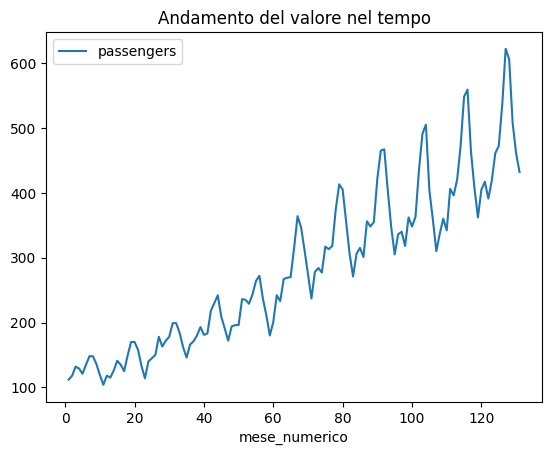

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data= data.dropna()
data.head(5)
data["mese_numerico"]= np.arange(1,len(data)+1)
data.head(5)
plot = data.plot(x="mese_numerico", y="passengers", kind="line", title="Andamento del valore nel tempo")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for mese_numerico > 100
data_after_100 = data[data["mese_numerico"] > 100]

# Prepare X and y
X = data["mese_numerico"].values.reshape(-1, 1)
y = data["passengers"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PolynomialFeatures for a second-degree polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict values for data after 100
X_after_100 = data_after_100["mese_numerico"].values.reshape(-1, 1)
X_after_100_poly = poly.transform(X_after_100)
y_after_100_pred = model.predict(X_after_100_poly)

# Calculate RMSE
y_test_pred = model.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_test_pred)

print(f"RMSE: {rmse}")
print(f"Predictions for mese_numerico > 100: {y_after_100_pred}")
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# forza apertura nel browser
pio.renderers.default = "browser"

# Create a scatter plot for the actual data
fig = px.scatter(data, x="mese_numerico", y="passengers", title="Actual Data and Predictions")

# Add the prediction line for the entire dataset
X_poly = poly.transform(X)
y_pred = model.predict(X_poly)
fig.add_trace(go.Scatter(x=data["mese_numerico"], y=y_pred, mode='lines', name='Prediction'))

# Add the prediction line for mese_numerico > 100
fig.add_trace(go.Scatter(x=data_after_100["mese_numerico"], y=y_after_100_pred, mode='lines', name='Prediction (After 100)'))

fig.update_layout(xaxis_title="Mese Numerico", yaxis_title="Passengers")

# Mostra nel browser
fig.show()


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [8]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import plotly.graph_objects as go

# Generate 100 points x between -3 and 3
x = np.linspace(-3, 3, 100)
y = x**3 - x + np.random.normal(0, 1, len(x))

# Create Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='polynomial-graph'),
    dcc.Slider(
        id='degree-slider',
        min=1,
        max=10,
        step=1,
        value=3,
        marks={i: str(i) for i in range(1, 11)},
        tooltip={"placement": "bottom", "always_visible": True}
    )
])

@app.callback(
    Output('polynomial-graph', 'figure'),
    [Input('degree-slider', 'value')]
)
def update_graph(degree):
    # Fit polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data'))
    fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name=f'Polynomial Degree {degree}'))
    fig.update_layout(title="Polynomial Regression", xaxis_title="x", yaxis_title="y")
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)